# Properties data preprocessing

In [16]:
import pandas as pd
import numpy as np
import re

df = pd.read_json("../data/property.json")
df.shape

(5, 12014)

In [17]:
properties_df = df.transpose()
properties_df.head()


,name,cost_text,coordinates,rooms,desc
https://www.domain.com.au/904-265-exhibition-street-melbourne-vic-3000-16637685,904/265 Exhibition Street Melbourne VIC 3000,$850 Per Week,"[-37.8095116, 144.9691204]","[2 Beds, 2 Baths, 1 Parking]",Darren Krause
https://www.domain.com.au/210-422-collins-street-melbourne-vic-3000-16637229,210/422 Collins Street Melbourne VIC 3000,$475 Per Week,"[-37.8170971, 144.9601487]","[1 Bed, 1 Bath]",Annalise Zamparo
https://www.domain.com.au/1902-200-spencer-street-melbourne-vic-3000-16636968,1902/200 Spencer Street Melbourne VIC 3000,$630 pw,"[-37.816228, 144.9532465]","[2 Beds, 1 Bath, 1 Parking]",Paola Faba
https://www.domain.com.au/312b-399-bourke-street-melbourne-vic-3000-16096996,312B/399 Bourke Street Melbourne VIC 3000,$450,"[-37.8147259, 144.9621291]","[1 Bed, 1 Bath]",Natalie Subotsch
https://www.domain.com.au/3313-228-la-trobe-street-melbourne-vic-3000-16636845,3313/228 La Trobe Street Melbourne VIC 3000,$900,"[-37.8096052, 144.962371]","[2 Beds, 1 Bath, 2 Parking]",Paula Tran


In [18]:
def extract_rooms(rooms_list):
    beds, baths, parkings = None, None, None
    for item in rooms_list:
        if 'Bed' in item:
            beds = int(item.split(' ')[0])
        elif 'Bath' in item:
            baths = int(item.split(' ')[0])
        elif 'Parking' in item:
            parkings = int(item.split(' ')[0])
    return beds, baths, parkings

In [19]:
# Applying the function and splitting the results
properties_df['beds'], properties_df['baths'], properties_df['parkings'] = zip(*properties_df['rooms'].apply(lambda x: extract_rooms(x)))

properties_df.drop('rooms', axis=1, inplace=True)

In [20]:
properties_df.head()

,name,cost_text,coordinates,desc,beds,baths,parkings
https://www.domain.com.au/904-265-exhibition-street-melbourne-vic-3000-16637685,904/265 Exhibition Street Melbourne VIC 3000,$850 Per Week,"[-37.8095116, 144.9691204]",Darren Krause,2.0,2.0,1.0
https://www.domain.com.au/210-422-collins-street-melbourne-vic-3000-16637229,210/422 Collins Street Melbourne VIC 3000,$475 Per Week,"[-37.8170971, 144.9601487]",Annalise Zamparo,1.0,1.0,NaN
https://www.domain.com.au/1902-200-spencer-street-melbourne-vic-3000-16636968,1902/200 Spencer Street Melbourne VIC 3000,$630 pw,"[-37.816228, 144.9532465]",Paola Faba,2.0,1.0,1.0
https://www.domain.com.au/312b-399-bourke-street-melbourne-vic-3000-16096996,312B/399 Bourke Street Melbourne VIC 3000,$450,"[-37.8147259, 144.9621291]",Natalie Subotsch,1.0,1.0,NaN
https://www.domain.com.au/3313-228-la-trobe-street-melbourne-vic-3000-16636845,3313/228 La Trobe Street Melbourne VIC 3000,$900,"[-37.8096052, 144.962371]",Paula Tran,2.0,1.0,2.0


In [21]:
def convert_to_weekly(price_text):
    try:
        # Identifying common text for different frequencies
        week = ["pw", "PW", "week", "/w", " pw"]
        month = ["pcm", "PCM", "pm", "PM", "mth", "month", "per month"]
        annual = ["p.a", "pa", "annually"]
        
        # Check for range indications
        if " to " in price_text:
            return np.nan

        # Extract the first numerical value for the price, correctly handling commas and decimals
        price = float(re.search(r'(\d+\.\d+|\.\d+|\d+)', price_text.replace(',', '')).group(1))

        
        # Check for frequency and convert to weekly
        if any(ext in price_text.lower() for ext in week):
            return price
        elif any(ext in price_text.lower() for ext in month):
            return price / 4.33
        elif any(ext in price_text.lower() for ext in annual):
            return price / 52
        else:
            return price  # default to weekly if no specific frequency is mentioned
    except:
        return np.nan

# Apply the function to the cost_text column
properties_df['weekly_rent'] = properties_df['cost_text'].apply(convert_to_weekly)

# Create invalid df with rows that have NaN in weekly_rent
invalid_df = properties_df[properties_df['weekly_rent'].isna()]

# Drop these rows from the main dataframe
properties_df = properties_df.dropna(subset=['weekly_rent'])

In [22]:
invalid_df['cost_text'].to_csv("../data/test.csv")

In [23]:
no_beds = properties_df[properties_df['beds'] < 1].copy()  # Creating a copy
no_beds.loc[:, 'postcode'] = no_beds['name'].str.extract(r'VIC (\d{4})')

# Count the appearances of each postcode
postcode_counts = no_beds['postcode'].value_counts()

print(postcode_counts)



3000    50
3008    10
3053     5
3051     4
3181     4
3122     4
3006     3
3004     3
3174     3
3182     3
3003     3
3636     3
3161     2
3169     2
3083     2
3056     1
3011     1
3031     1
3021     1
3030     1
3124     1
3123     1
3085     1
3125     1
3155     1
3068     1
3066     1
3065     1
3168     1
3128     1
3141     1
3193     1
3199     1
3220     1
3223     1
3198     1
3393     1
3717     1
3722     1
3730     1
3851     1
3910     1
3977     1
3980     1
Name: postcode, dtype: int64


In [24]:
filtered_df = properties_df[(properties_df['beds'] > 0) & (properties_df['baths'] > 0) & (properties_df['weekly_rent'] < 10000)]

In [25]:
filtered_df.head()

,name,cost_text,coordinates,desc,beds,baths,parkings,weekly_rent
https://www.domain.com.au/904-265-exhibition-street-melbourne-vic-3000-16637685,904/265 Exhibition Street Melbourne VIC 3000,$850 Per Week,"[-37.8095116, 144.9691204]",Darren Krause,2.0,2.0,1.0,850.0
https://www.domain.com.au/210-422-collins-street-melbourne-vic-3000-16637229,210/422 Collins Street Melbourne VIC 3000,$475 Per Week,"[-37.8170971, 144.9601487]",Annalise Zamparo,1.0,1.0,NaN,475.0
https://www.domain.com.au/1902-200-spencer-street-melbourne-vic-3000-16636968,1902/200 Spencer Street Melbourne VIC 3000,$630 pw,"[-37.816228, 144.9532465]",Paola Faba,2.0,1.0,1.0,630.0
https://www.domain.com.au/312b-399-bourke-street-melbourne-vic-3000-16096996,312B/399 Bourke Street Melbourne VIC 3000,$450,"[-37.8147259, 144.9621291]",Natalie Subotsch,1.0,1.0,NaN,450.0
https://www.domain.com.au/3313-228-la-trobe-street-melbourne-vic-3000-16636845,3313/228 La Trobe Street Melbourne VIC 3000,$900,"[-37.8096052, 144.962371]",Paula Tran,2.0,1.0,2.0,900.0


In [26]:
filtered_df[filtered_df['weekly_rent'] > 5000]

,name,cost_text,coordinates,desc,beds,baths,parkings,weekly_rent
https://www.domain.com.au/1-weston-street-balwyn-vic-3103-16631129,1 Weston Street Balwyn VIC 3103,"$9,950 weekly","[-37.8117577, 145.0775507]",* Unverified feature,6.0,7.0,8.0,9950.0
https://www.domain.com.au/1-weston-street-balwyn-vic-3103-16595983,1 Weston Street Balwyn VIC 3103,"$9,950","[-37.8117577, 145.0775507]",* Unverified feature,6.0,7.0,8.0,9950.0


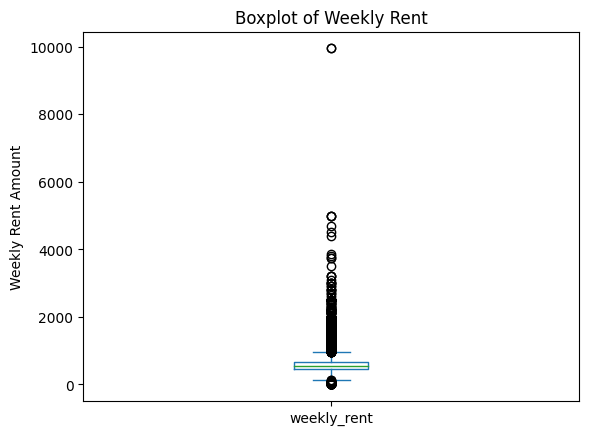

In [27]:
import matplotlib.pyplot as plt
filtered_df['weekly_rent'].plot(kind='box')
plt.title('Boxplot of Weekly Rent')
plt.ylabel('Weekly Rent Amount')
plt.show()